In [1]:
import pandas as pd
import geopandas as gpd

sample = "/Users/yeondu/Downloads/_census_data_2021_bnd_dong_bnd_dong_11_2021_2021/bnd_dong_11_2021_2021_2Q.shp"
seoul = gpd.read_file(sample)
seoul = pd.DataFrame(seoul)
seoul = seoul.drop(['BASE_DATE','ADM_DR_CD'],axis=1)
#seoul.info()
seoul

,ADM_DR_NM,geometry
0,사직동,"POLYGON ((953553.932 1953335.741, 953555.211 1..."
1,삼청동,"POLYGON ((953844.081 1955492.177, 953858.644 1..."
2,부암동,"POLYGON ((952490.380 1956548.821, 952497.594 1..."
3,평창동,"POLYGON ((953683.828 1959209.871, 953665.283 1..."
4,무악동,"POLYGON ((952298.144 1953539.606, 952324.838 1..."
...,...,...
420,둔촌1동,"POLYGON ((968611.972 1946736.729, 968614.219 1..."
421,둔촌2동,"POLYGON ((969658.021 1948737.380, 969656.712 1..."
422,암사1동,"POLYGON ((967820.858 1950659.982, 967821.733 1..."
423,천호2동,"POLYGON ((966110.271 1950148.101, 966118.161 1..."


In [2]:
Bike = pd.read_csv("/Users/yeondu/Downloads/final_final.csv", index_col = 0)
Bike = Bike.drop(['위도','경도','탄소량','번호'],axis=1)
Bike

,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),주말,요일,대여소근처역,소재지,동,산업종류
대여일자,,,,,,,,,,,,,,,,
2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,N,10대,1,48.30,1999.70,10,평일,수,등촌,양천구,목3동,사업시설관리 및 사업지원 서비스업
2022-06-01,0,2059,2059. 보라매공원 정문,정기권,N,10대,1,27.47,991.00,9,평일,수,보라매,동작구,신대방2동,보건업 및 사회복지 서비스업
2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,N,10대,1,20.63,868.17,3,평일,수,광운대,성북구,번동,금융 및 보험업
2022-06-01,0,750,750. 연의근린공원 건너편,정기권,N,10대,1,13.97,560.00,4,평일,수,신정네거리,양천구,신정3동,운수업
2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,N,10대,1,12.15,590.00,3,평일,수,신목동,양천구,목5동,보건업 및 사회복지 서비스업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,23,4765,4765. 동대문디자인플라자,정기권,M,N,1,30.12,1170.00,65,평일,목,동대문,중구,광희동,도매 및 소매업
2022-06-30,23,4813,4813. 망우지구대,정기권,M,N,1,63.65,2820.00,18,평일,목,망우,중랑구,망우본동,운수업
2022-06-30,23,4564,4564. 63스퀘어,정기권,M,N,1,65.64,2210.00,15,평일,목,노량진,영등포구,여의동,금융 및 보험업


In [38]:
# check missing 'dong' values

import numpy as np

Bike_dong = Bike['동'].unique()
Bike_dong = np.sort(Bike_dong)
seoul_dong = seoul['ADM_DR_NM']
seoul_dong = seoul_dong.sort_values(ascending=True)


dic = {'Bike1' : Bike_dong, 'seoul1' : seoul_dong}

res = pd.DataFrame.from_dict(dic, orient='index')
res = res.transpose()
#res.to_csv('/Users/yeondu/Downloads/res.csv',encoding='utf-8')


In [3]:
# unite missing 'dong's

from shapely.ops import cascaded_union

polygons = [seoul.loc[seoul['ADM_DR_NM'] =='가양1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='가양2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='가양3동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '가양동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='개포1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='개포2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='개포4동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '개포동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='공릉1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='공릉2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '공릉동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='남가좌1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='남가좌2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '남가좌동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='노량진1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='노량진2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '노량진동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()




polygons = [seoul.loc[seoul['ADM_DR_NM'] =='논현1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='논현2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '논현동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='대치1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='대치2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='대치4동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '대치동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='도봉1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='도봉2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '도봉동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='망우3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='망우본동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '망우동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='면목2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='면목3·8동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='면목4동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='면목5동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='면목7동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='면목본동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '면목동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='목1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='목2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='목3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='목4동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='목5동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '목동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='묵1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='묵2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '묵동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='반포1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='반포2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='반포3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='반포4동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='반포본동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '반포동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='방배1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='방배2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='방배3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='방배4동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='방배본동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '방배동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='방학1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='방학2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='방학3동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '방학동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='번1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='번2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='번3동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '번동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='북가좌1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='북가좌2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '북가좌동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='상계1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='상계2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='상계5동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '상계동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='상도1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='상도2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='상도3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='상도4동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '상도동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='상봉1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='상봉2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '상봉동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='서초1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='서초2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='서초3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='서초4동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '서초동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='수유1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='수유2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='수유3동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '수유동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='신내1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='신내2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '신내동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='쌍문1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='쌍문2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='쌍문3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='쌍문4동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '쌍문동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='양재1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='양재2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '양재동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='양평1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='양평2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '양평동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='역삼1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='역삼2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '역삼동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='월계1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='월계2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='월계3동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '월계동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()




polygons = [seoul.loc[seoul['ADM_DR_NM'] =='중계1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='중계2·3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='중계4동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='중계본동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '중계동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()




polygons = [seoul.loc[seoul['ADM_DR_NM'] =='중화1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='중화2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '중화동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='창1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='창2동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='창3동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='창4동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='창5동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '창동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='풍납1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='풍납2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '풍납동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()


polygons = [seoul.loc[seoul['ADM_DR_NM'] =='도곡1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='도곡2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '도곡동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
#seoul.tail()



polygons = [seoul.loc[seoul['ADM_DR_NM'] =='홍은1동', 'geometry'].iloc[0],seoul.loc[seoul['ADM_DR_NM'] =='홍은2동', 'geometry'].iloc[0]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary = boundary.iloc[0]

dic = {'ADM_DR_NM': '홍은동', 'geometry': boundary}
seoul = seoul.append(dic, ignore_index=True)
seoul.tail(36)



/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_23926/1185122836.py:6: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary = gpd.GeoSeries(cascaded_union(polygons))
/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_23926/1185122836.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seoul = seoul.append(dic, ignore_index=True)
/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_23926/1185122836.py:15: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary = gpd.GeoSeries(cascaded_union(polygons))
/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_23926/1185122836.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seoul = seoul.append(dic, ignore_index=Tru

/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_23926/1185122836.py:265: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seoul = seoul.append(dic, ignore_index=True)
/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_23926/1185122836.py:272: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary = gpd.GeoSeries(cascaded_union(polygons))
/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_23926/1185122836.py:276: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seoul = seoul.append(dic, ignore_index=True)
/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_23926/1185122836.py:283: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  boundary = gpd.GeoSeries(cascaded_union(pol

,ADM_DR_NM,geometry
423,천호2동,POLYGON ((966110.2706999994 1950148.1013999998...
424,길동,"POLYGON ((968944.2182999975 1949625.263, 96894..."
425,가양동,"POLYGON ((943931.5827000004 1951522.210500001,..."
426,개포동,"POLYGON ((961579.4637 1941233.7836000016, 9615..."
427,공릉동,POLYGON ((961937.6768999998 1959198.5576000027...
428,남가좌동,POLYGON ((948300.3979999998 1953040.3606000002...
429,노량진동,POLYGON ((950481.1423000018 1945280.4344000006...
430,논현동,POLYGON ((957971.5410000016 1945129.2678999999...
431,대치동,"POLYGON ((961603.324299999 1943530.642, 961603..."
432,도봉동,POLYGON ((960229.9630999982 1966022.4568000017...


In [4]:
# delete rows with missing 'dong's

Bike = Bike[Bike.동 != '동작동']
Bike = Bike[Bike.동 != '신설동']
Bike = Bike[Bike.동 != '신천동']

In [5]:
# change 'dong' names for particular 'dong's

Bike['동'] = Bike['동'].replace(['상일1동'],'상일동')
Bike['동'] = Bike['동'].replace(['상일2동'],'상일동')

In [6]:
Geometries = pd.Series(seoul.geometry.values, index=seoul.ADM_DR_NM).to_dict()

In [7]:
from shapely import wkt

def geo(a):
    newcolumn=[]
    for n in a:
        m= Geometries[n]
        newcolumn.append(m)
    return(newcolumn)

Bike['Geometry'] = geo(Bike['동'])
Bike


/Users/yeondu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,이동거리(M),이용시간(분),주말,요일,대여소근처역,소재지,동,산업종류,Geometry
대여일자,,,,,,,,,,,,,,,,,
2022-06-01,0,742,742. 등촌역 5번 출구 뒤,정기권,N,10대,1,48.30,1999.70,10,평일,수,등촌,양천구,목3동,사업시설관리 및 사업지원 서비스업,"POLYGON ((944409.6474999995 1950000.357800001,..."
2022-06-01,0,2059,2059. 보라매공원 정문,정기권,N,10대,1,27.47,991.00,9,평일,수,보라매,동작구,신대방2동,보건업 및 사회복지 서비스업,"POLYGON ((949536.7947000021 1944508.1222, 9495..."
2022-06-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,N,10대,1,20.63,868.17,3,평일,수,광운대,성북구,번동,금융 및 보험업,"POLYGON ((959634.1647999992 1959094.0896, 9596..."
2022-06-01,0,750,750. 연의근린공원 건너편,정기권,N,10대,1,13.97,560.00,4,평일,수,신정네거리,양천구,신정3동,운수업,POLYGON ((942898.5791999982 1946736.9497000007...
2022-06-01,0,755,755. 목동1단지아파트 상가 앞,정기권,N,10대,1,12.15,590.00,3,평일,수,신목동,양천구,목5동,보건업 및 사회복지 서비스업,POLYGON ((945645.2085999982 1949510.8639000012...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,23,4765,4765. 동대문디자인플라자,정기권,M,N,1,30.12,1170.00,65,평일,목,동대문,중구,광희동,도매 및 소매업,POLYGON ((956729.5412999995 1952329.8049999997...
2022-06-30,23,4813,4813. 망우지구대,정기권,M,N,1,63.65,2820.00,18,평일,목,망우,중랑구,망우본동,운수업,"POLYGON ((964898.727899998 1957195.2002000003,..."
2022-06-30,23,4564,4564. 63스퀘어,정기권,M,N,1,65.64,2210.00,15,평일,목,노량진,영등포구,여의동,금융 및 보험업,"POLYGON ((949183.1241000001 1949092.929800001,..."


In [8]:
Bike['Geometry'] = Bike['Geometry'].astype(str)

In [10]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694083 entries, 2022-06-01 to 2022-06-30
Data columns (total 17 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여시간      int64  
 1   대여소번호     int64  
 2   대여소명      object 
 3   대여구분코드    object 
 4   성별        object 
 5   연령대코드     object 
 6   이용건수      int64  
 7   운동량       object 
 8   이동거리(M)   float64
 9   이용시간(분)   int64  
 10  주말        object 
 11  요일        object 
 12  대여소근처역    object 
 13  소재지       object 
 14  동         object 
 15  산업종류      object 
 16  Geometry  object 
dtypes: float64(1), int64(4), object(12)
memory usage: 507.3+ MB


In [11]:
Bike1.to_csv('/Users/yeondu/Documents/project_datacampus/for_visualization1.csv', encoding='utf-8')

In [12]:
Bike2.to_csv('/Users/yeondu/Documents/project_datacampus/for_visualization2.csv', encoding='utf-8')

In [9]:
Bike1 = Bike[:2000000]
Bike2 = Bike[2000000:]

In [2]:
from tqdm import tqdm, tqdm_pandas

from shapely import wkt
import pandas as pd

tqdm.pandas()

Bike1 = pd.read_csv('/Users/yeondu/Documents/project_datacampus/for_visualization1.csv', index_col=0)

Bike1['geometry'] = Bike1['Geometry'].progress_apply(wkt.loads)

100%|███████████████████████████████| 2000000/2000000 [11:45<00:00, 2835.19it/s]


In [3]:
from tqdm import tqdm, tqdm_pandas
tqdm.pandas()

Bike2 = pd.read_csv('/Users/yeondu/Documents/project_datacampus/for_visualization2.csv', index_col=0)
Bike2['geometry'] = Bike2['Geometry'].progress_apply(wkt.loads)

100%|███████████████████████████████| 1694083/1694083 [09:56<00:00, 2840.40it/s]


In [4]:
import geopandas as gpd

Bike1_gdf = gpd.GeoDataFrame(Bike1, crs='epsg:4326')
Bike2_gdf = gpd.GeoDataFrame(Bike2, crs='epsg:4326')

In [5]:
Bike_gdf = Bike1_gdf.append(Bike2_gdf)
Bike_gdf = Bike_gdf.drop(['이용건수', '소재지', '대여소명'], axis=1)
Bike_gdf

/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_1044/1168894506.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Bike_gdf = Bike1_gdf.append(Bike2_gdf)


,대여시간,대여소번호,대여구분코드,성별,연령대코드,운동량,이동거리(M),이용시간(분),주말,요일,대여소근처역,동,산업종류,Geometry,geometry
대여일자,,,,,,,,,,,,,,,
2022-06-01,0,742,정기권,N,10대,48.30,1999.70,10,평일,수,등촌,목3동,사업시설관리 및 사업지원 서비스업,"POLYGON ((944409.6474999995 1950000.357800001,...","POLYGON ((944409.64750 1950000.35780, 944399.2..."
2022-06-01,0,2059,정기권,N,10대,27.47,991.00,9,평일,수,보라매,신대방2동,보건업 및 사회복지 서비스업,"POLYGON ((949536.7947000021 1944508.1222, 9495...","POLYGON ((949536.79470 1944508.12220, 949538.8..."
2022-06-01,0,1349,정기권,N,10대,20.63,868.17,3,평일,수,광운대,번동,금융 및 보험업,"POLYGON ((959634.1647999992 1959094.0896, 9596...","POLYGON ((959634.16480 1959094.08960, 959638.1..."
2022-06-01,0,750,정기권,N,10대,13.97,560.00,4,평일,수,신정네거리,신정3동,운수업,POLYGON ((942898.5791999982 1946736.9497000007...,"POLYGON ((942898.57920 1946736.94970, 942914.0..."
2022-06-01,0,755,정기권,N,10대,12.15,590.00,3,평일,수,신목동,목5동,보건업 및 사회복지 서비스업,POLYGON ((945645.2085999982 1949510.8639000012...,"POLYGON ((945645.20860 1949510.86390, 945645.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,23,4765,정기권,M,N,30.12,1170.00,65,평일,목,동대문,광희동,도매 및 소매업,POLYGON ((956729.5412999995 1952329.8049999997...,"POLYGON ((956729.54130 1952329.80500, 956729.7..."
2022-06-30,23,4813,정기권,M,N,63.65,2820.00,18,평일,목,망우,망우본동,운수업,"POLYGON ((964898.727899998 1957195.2002000003,...","POLYGON ((964898.72790 1957195.20020, 964906.8..."
2022-06-30,23,4564,정기권,M,N,65.64,2210.00,15,평일,목,노량진,여의동,금융 및 보험업,"POLYGON ((949183.1241000001 1949092.929800001,...","POLYGON ((949183.12410 1949092.92980, 949186.7..."


In [6]:
# 한글깨짐 해결
import matplotlib.pyplot as plt

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "S-Core Dream"
    return font_family
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family라는 변수에 할당합니다.
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

%config InlineBackend.figure_format = 'retina'



In [47]:
d = Bike_gdf.groupby(['대여소번호','주말'])['대여소번호'].count()
print(d)

대여소번호  주말
102    주말    1206
       평일    2762
103    주말    1041
       평일    2210
104    주말     501
             ... 
5853   평일    1080
5854   주말     571
       평일    1589
5855   주말     216
       평일     557
Name: 대여소번호, Length: 5236, dtype: int64


In [7]:
# 성별로 데이터프레임을 나누기

Bike_f = Bike_gdf[Bike_gdf.성별 == 'F'] #970027
Bike_m = Bike_gdf[Bike_gdf.성별 == 'M'] #1465782

# 대여소별로 grouping

grouped_f = Bike_f.groupby(['대여소번호'])
grouped_m = Bike_m.groupby(['대여소번호'])


In [18]:
import numpy as np
np.percentile(Bike_f['이용시간(분)'],95)


92.0

(array([9.666e+05, 3.138e+03, 2.170e+02, 5.300e+01, 9.000e+00, 7.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  193.8,  387.6,  581.4,  775.2,  969. , 1162.8, 1356.6,
        1550.4, 1744.2, 1938. ]),
 <BarContainer object of 10 artists>)

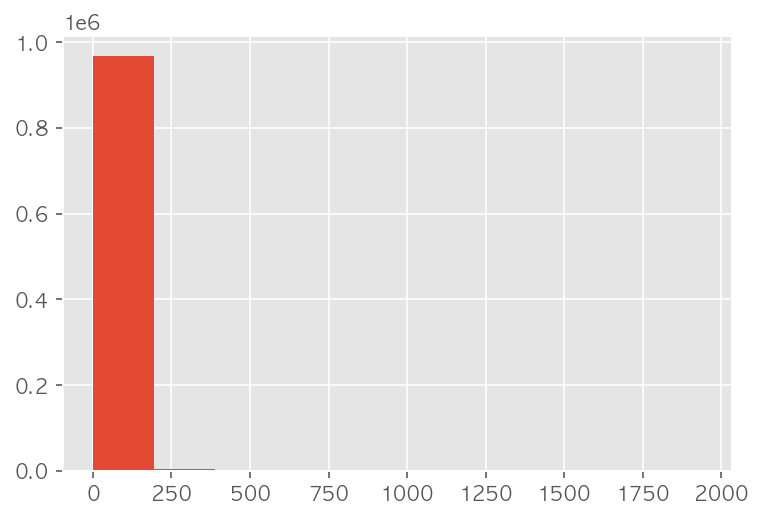

In [15]:
plt.hist(Bike_f['이용시간(분)'])

(array([304895., 232474., 119698.,  74744.,  55947.,  47366.,  35456.,
         19754.,  15598.,  14563.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <BarContainer object of 10 artists>)

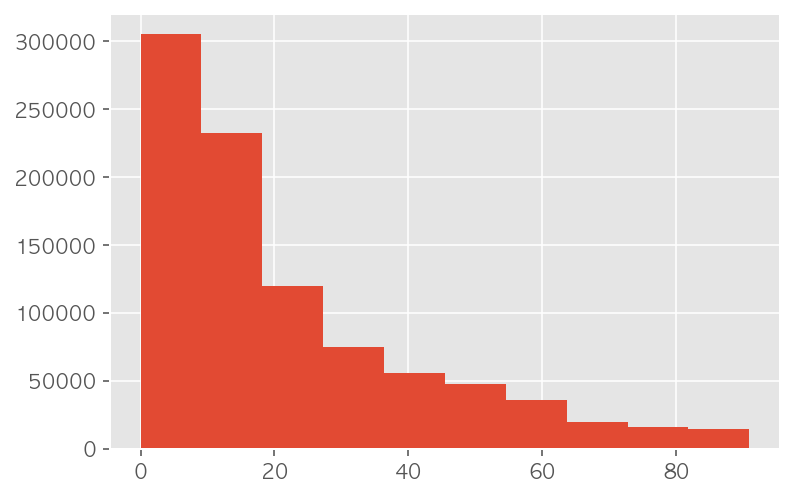

In [17]:
dummy = Bike_f[Bike_f['이용시간(분)'] < 92]
plt.hist(dummy['이용시간(분)'])

In [36]:
Bike_f.drop(Bike_f.loc[Bike_f["운동량"]== r"\N"].index, inplace=True)
Bike_f["운동량"] = pd.to_numeric(Bike_f["운동량"])

/var/folders/4z/mjw5lnr16_j3sgr5pzqr4n6m0000gp/T/ipykernel_1044/625672973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bike_f.drop(Bike_f.loc[Bike_f["운동량"]== r"\N"].index, inplace=True)


In [37]:
z = np.percentile(Bike_f['운동량'],95)
z

IndexError: cannot do a non-empty take from an empty axes.

In [28]:
Bike_m.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1465782 entries, 2022-06-01 to 2022-06-30
Data columns (total 15 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   대여시간      1465782 non-null  int64   
 1   대여소번호     1465782 non-null  int64   
 2   대여구분코드    1465782 non-null  object  
 3   성별        1465782 non-null  object  
 4   연령대코드     1465782 non-null  object  
 5   운동량       1465782 non-null  object  
 6   이동거리(M)   1465782 non-null  float64 
 7   이용시간(분)   1465782 non-null  int64   
 8   주말        1465782 non-null  object  
 9   요일        1465782 non-null  object  
 10  대여소근처역    1465782 non-null  object  
 11  동         1465782 non-null  object  
 12  산업종류      1465782 non-null  object  
 13  Geometry  1465782 non-null  object  
 14  geometry  1465782 non-null  geometry
dtypes: float64(1), geometry(1), int64(3), object(10)
memory usage: 211.2+ MB


<AxesSubplot:>

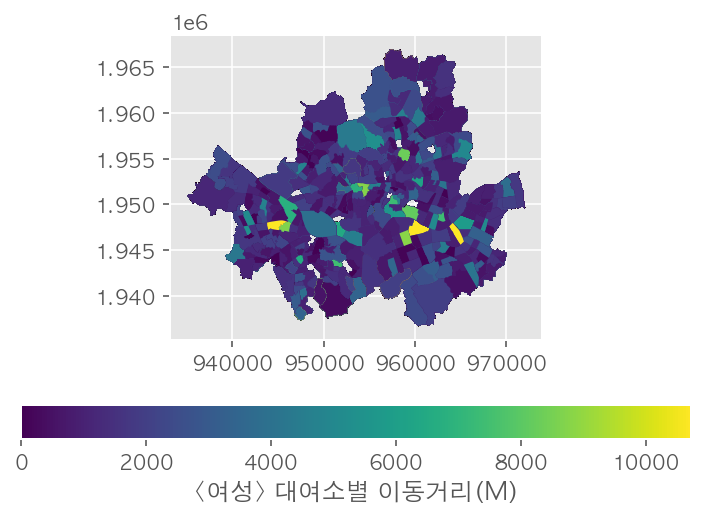

<Figure size 7200x7200 with 0 Axes>

In [33]:
#대여소별 이용시간(분) 시각화

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,1)
plt.figure(figsize=(100,100))

운동량_여 = Bike_f.plot(column='운동량',ax=ax, aspect=1, vmin=0, vmax=z, legend=True, legend_kwds={'label': '<여성> 대여소별 운동량(kcal)', 'orientation':'horizontal'})

운동량_여

In [34]:
운동량_여.figure.savefig("/Users/yeondu/Documents/project_datacampus/figures/운동량_여.png",dpi=300, bbox_inches='tight')